In [86]:
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"

In [2]:
dtype = {
    "DayOfWeek": np.uint8,
    "DayofMonth": np.uint8,
    "Month": np.uint8,
    "Cancelled": np.uint8,
    "Year": np.uint16,
    "FlightNum": np.uint16,
    "Distance": np.uint16,
    "UniqueCarrier": str,
    "CancellationCode": str,
    "Origin": str,
    "Dest": str,
    "ArrDelay": np.float32,
    "DepDelay": np.float32,
    "CarrierDelay": np.float32,
    "WeatherDelay": np.float32,
    "NASDelay": np.float32,
    "SecurityDelay": np.float32,
    "LateAircraftDelay": np.float32,
    "DepTime": np.float32,
}

PATH_TO_DATA = Path("/Users/sergey/Documents/Computer Science/machine learning/mlcourse_ai_bonus_jupyter_book/_static/data/assignment2") 
flights_df = pd.read_csv(
    PATH_TO_DATA / "flights_2008.csv.bz2", usecols=dtype.keys(), dtype=dtype
)

In [3]:
print(flights_df.shape)
print(flights_df.columns)
flights_df.head()

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


In [4]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               uint16 
 1   Month              uint8  
 2   DayofMonth         uint8  
 3   DayOfWeek          uint8  
 4   DepTime            float32
 5   UniqueCarrier      object 
 6   FlightNum          uint16 
 7   ArrDelay           float32
 8   DepDelay           float32
 9   Origin             object 
 10  Dest               object 
 11  Distance           uint16 
 12  Cancelled          uint8  
 13  CancellationCode   object 
 14  CarrierDelay       float32
 15  WeatherDelay       float32
 16  NASDelay           float32
 17  SecurityDelay      float32
 18  LateAircraftDelay  float32
dtypes: float32(8), object(4), uint16(3), uint8(4)
memory usage: 494.7+ MB


In [5]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830566,478.068909,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,8.168451,38.501938,-519.0,-10.0,-2.0,12.0,2461.0
DepDelay,6873482.0,9.972576,35.311272,-534.0,-4.0,-1.0,8.0,2467.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


<Axes: xlabel='UniqueCarrier'>

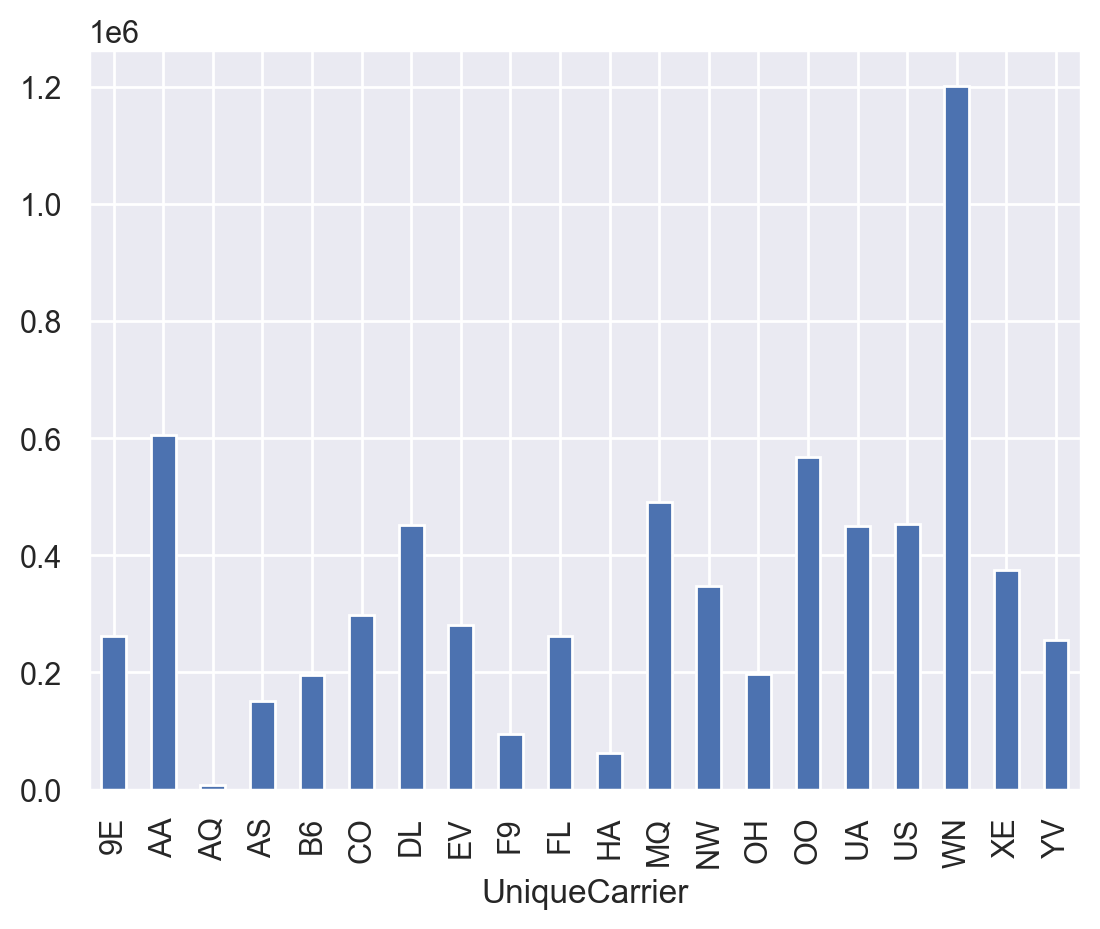

In [6]:
flights_df.groupby("UniqueCarrier").size().plot(kind="bar")

In [7]:
flights_df.groupby(["UniqueCarrier", "FlightNum"])["Distance"].sum().sort_values(
    ascending=False
).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244
               14           1796244
UA             52           1789722
Name: Distance, dtype: uint64

In [8]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


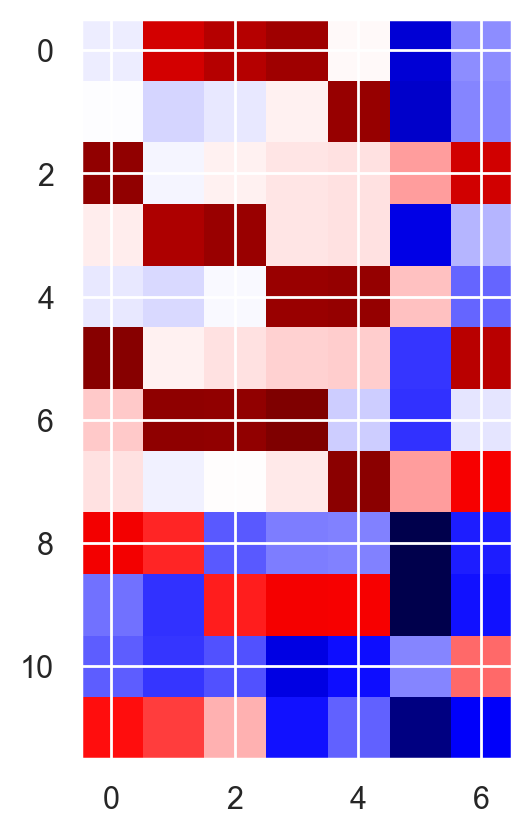

In [9]:
plt.imshow(
    pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
    cmap="seismic",
    interpolation="none"
)

array([[<Axes: title={'center': 'Distance'}>]], dtype=object)

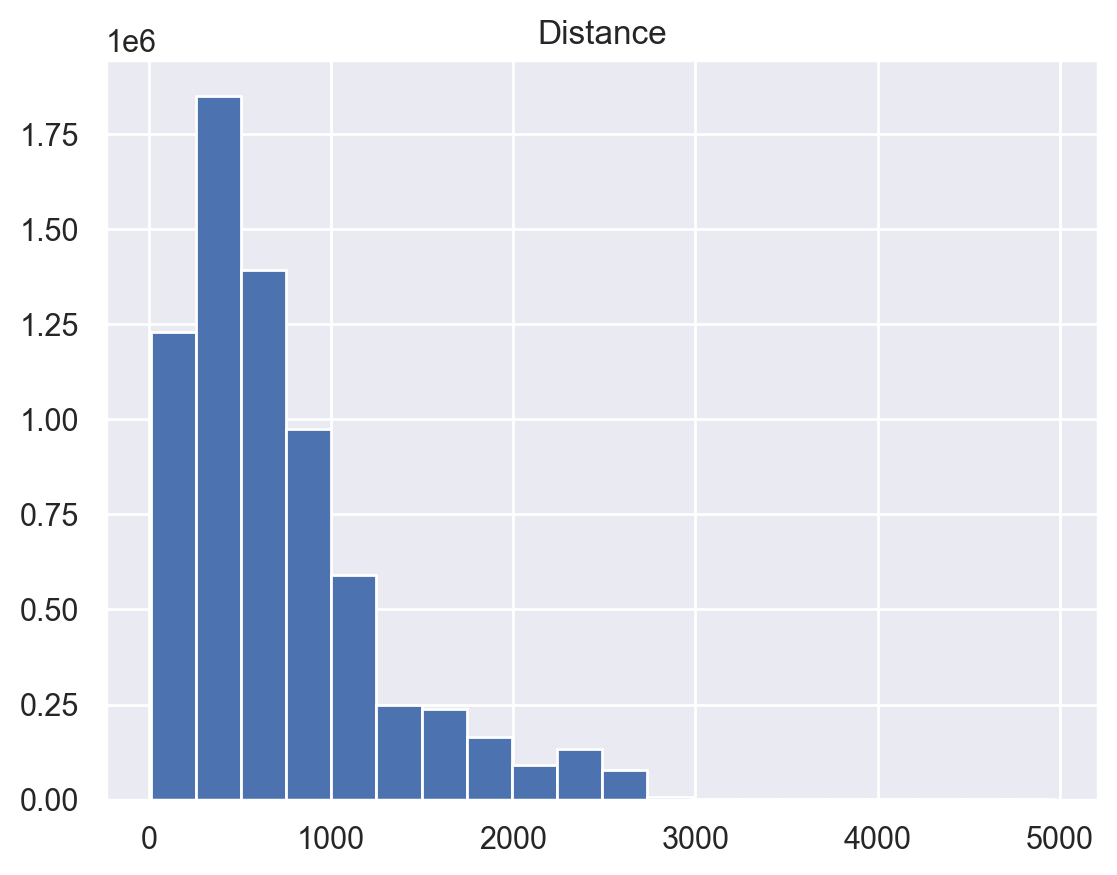

In [10]:
flights_df.hist("Distance", bins=20)

Making a histogram of flight frequency by date.

<Axes: xlabel='Date'>

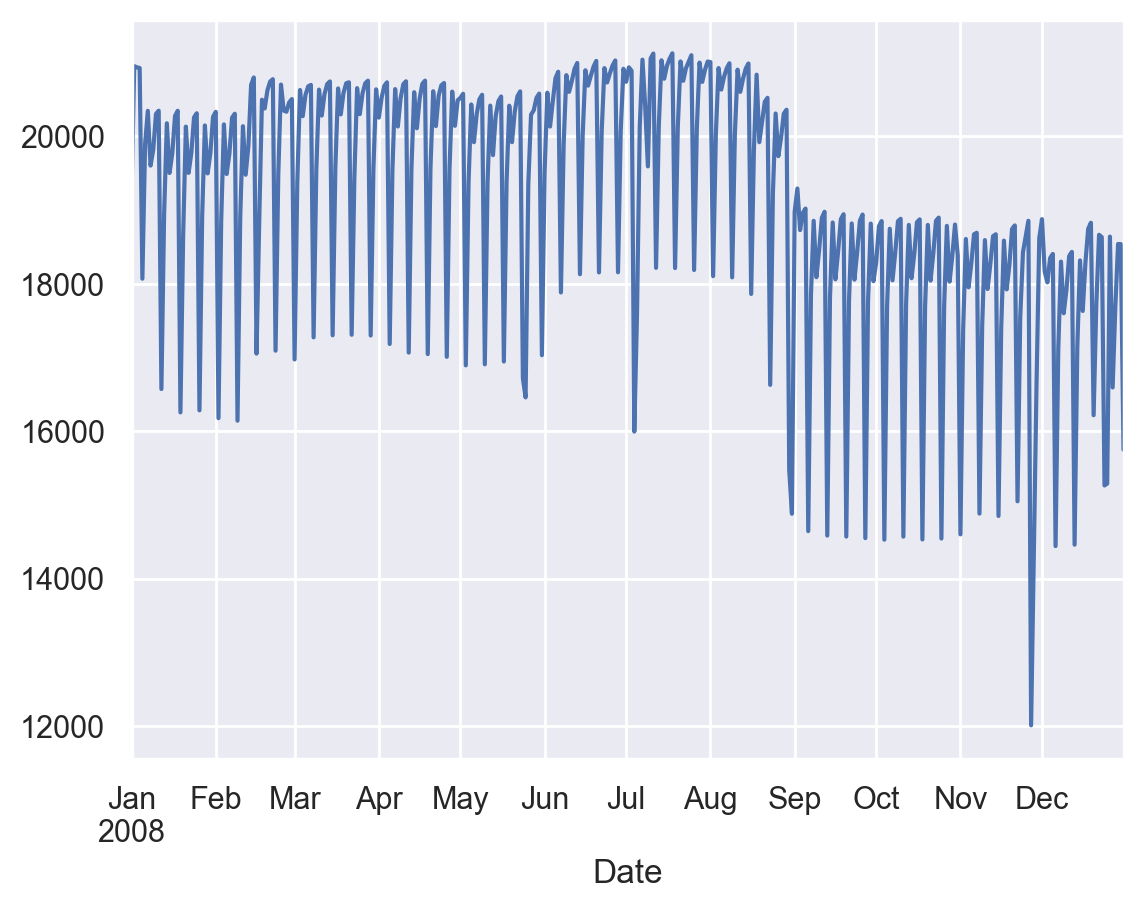

In [11]:
flights_df["Date"] = pd.to_datetime(
    flights_df.rename(columns={"DayofMonth": "Day"})[["Year", "Month", "Day"]]
)
num_flights_by_date = flights_df.groupby("Date").size()
num_flights_by_date.plot()

<Axes: xlabel='Date'>

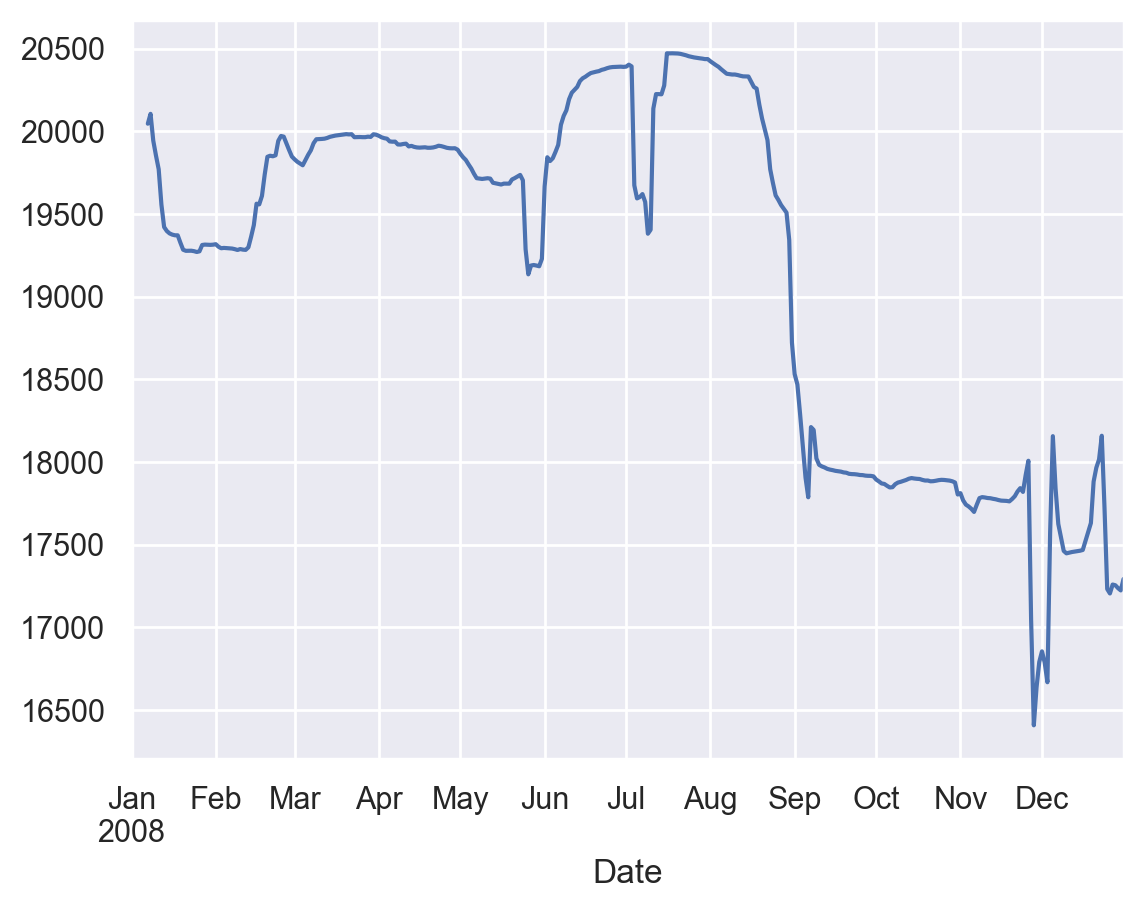

In [12]:
num_flights_by_date.rolling(window=7).mean().plot()

In [13]:
flights_df["DepHour"] = flights_df["DepTime"] // 100
flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)
flights_df["DepHour"].describe()

/var/folders/n_/fptkl59n3m546hy_tw45d7lc0000gn/T/ipykernel_46142/4287764242.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  flights_df["DepHour"].replace(to_replace=24, value=0, inplace=True)


count    6.873482e+06
mean     1.303737e+01
std      4.789944e+00
min      0.000000e+00
25%      9.000000e+00
50%      1.300000e+01
75%      1.700000e+01
max      2.300000e+01
Name: DepHour, dtype: float64

1. How many unique carriers are there in our dataset?

In [14]:
flights_df["UniqueCarrier"].nunique()

20

2. We have both cancelled and completed flights in the dataset. Check if there are more completed or cancelled flights. What is the difference? 



In [15]:
len(flights_df[flights_df["Cancelled"] == 1]) - len(flights_df[flights_df["Cancelled"] == 0]) 

-6734860

3. Find a flight with the longest departure delay and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?

In [16]:
flights_df[flights_df["DepDelay"] == flights_df["DepDelay"].max()]["Dest"], flights_df[flights_df["ArrDelay"] == flights_df["ArrDelay"].max()]["Dest"]

(2235378    MSP
 Name: Dest, dtype: object,
 1018798    MSP
 Name: Dest, dtype: object)

4. Find the carrier that has the greatest number of cancelled flights.

In [19]:
flights_df[flights_df["Cancelled"] == 1]["UniqueCarrier"].value_counts().head()

UniqueCarrier
MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
Name: count, dtype: int64

5. Let’s examine departure time and consider distribution by hour (column DepHour that we’ve created earlier). Which hour has the highest percentage of flights?

In [23]:
flights_df["DepHour"].value_counts(normalize=True).idxmax()

np.float32(8.0)

In [45]:
# групируем данные по часам, 
flights_df.groupby("DepHour")["Cancelled"].mean().sort_values(ascending=False).head()


DepHour
1.0     0.000682
2.0     0.000540
23.0    0.000521
22.0    0.000476
0.0     0.000344
Name: Cancelled, dtype: float64

8.  Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.

In [62]:
flights_df[flights_df["Cancelled"] == 0].groupby("DepHour").size().idxmax()

np.float32(8.0)

Question 9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?

Нужно посчитать среднюю зажержку для каждого часа.

In [65]:
flights_df[flights_df["Cancelled"] == 0].groupby("DepHour")["DepDelay"].mean()

DepHour
0.0      70.735130
1.0     111.783852
2.0     122.591354
3.0      95.819931
4.0       3.374742
5.0      -4.255584
6.0      -1.629400
7.0       0.102520
8.0       1.760612
9.0       3.753258
10.0      5.462338
11.0      6.681925
12.0      7.902812
13.0      8.811804
14.0     10.351616
15.0     11.878466
16.0     11.883778
17.0     13.212060
18.0     15.340142
19.0     16.877960
20.0     22.784990
21.0     23.030813
22.0     38.038555
23.0     60.012043
Name: DepDelay, dtype: float32

10. Considering only the completed flights by the carrier, that you have found in Question 4, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?

In [74]:
flights_df[(flights_df["UniqueCarrier"] == "MQ") & (flights_df["Cancelled"] == 0)].groupby("DepHour").size().idxmax()

np.float32(10.0)

11. Find top-10 carriers in terms of the number of completed flights (UniqueCarrier column)?

In [79]:
flights_df[flights_df["Cancelled"] == 0].groupby("UniqueCarrier").size().sort_values(ascending=False).head(10)

UniqueCarrier
WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
dtype: int64

In [83]:
# другой способ. дайте столбец UniqueCarrier, сторок у котрых Cancelled == 0, 
flights_df.loc[flights_df["Cancelled"] == 0, ["UniqueCarrier"]].value_counts().head(10)

UniqueCarrier
WN               1189365
AA                587445
OO                554723
MQ                472362
US                447007
DL                445118
UA                438974
XE                364518
NW                344746
CO                294753
Name: count, dtype: int64

12. Plot distributions of flight cancellation reasons (CancellationCode).

<Axes: xlabel='CancellationCode', ylabel='count'>

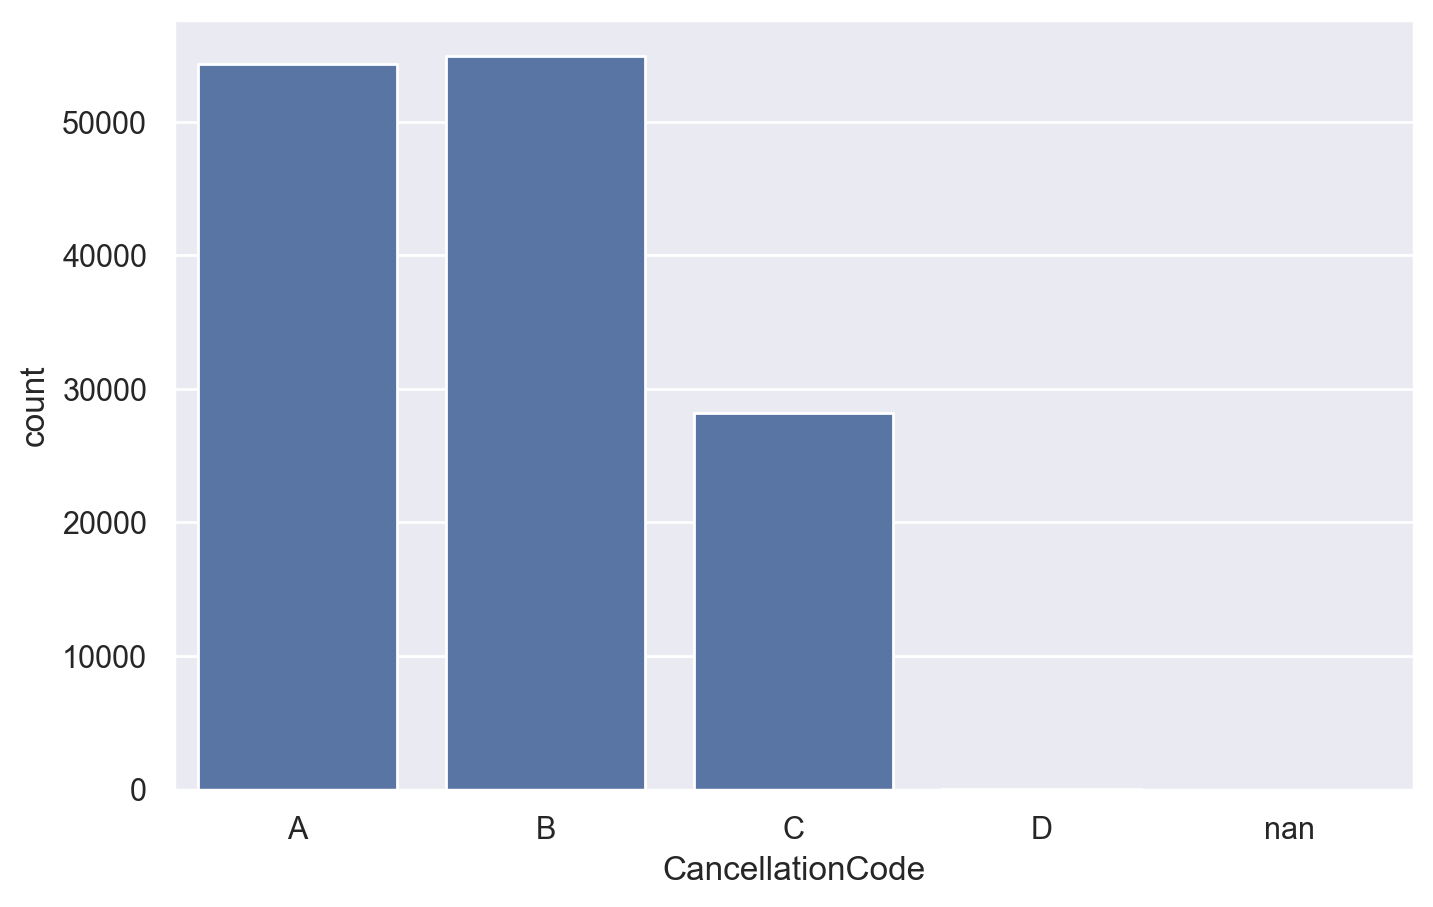

In [ ]:
sns.countplot(data=flights_df, x="CancellationCode", order=flights_df["CancellationCode"].sort_values())

13. Which route is the most frequent, in terms of the number of flights?

In [102]:
flights_df["Route"] = flights_df["Origin"] + "->" + flights_df["Dest"]
flights_df["Route"].value_counts()

Route
SFO->LAX    13788
LAX->SFO    13390
OGG->HNL    12383
LGA->BOS    12035
BOS->LGA    12029
            ...  
FAR->MCI        1
DRO->ABQ        1
BOI->ATW        1
SJC->FAT        1
PHL->GRR        1
Name: count, Length: 5366, dtype: int64

14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.

In [119]:
top_5_delayed = flights_df[flights_df["DepDelay"] > 0].groupby("Route").size().sort_values(ascending=False).head(5)

df_top_5_delayed = flights_df[flights_df["Route"].isin(top_5_delayed.index)] # все полеты, по самым задеживаемым направлениям

(df_top_5_delayed["WeatherDelay"] > 0).sum() # для каждой из df получили, есть ли в ней WeatherDelay

np.int64(668)

15. Examine the hourly distribution of departure times. Choose all correct statements:

<Axes: title={'center': 'Number of flights depending on departure hour'}, xlabel='DepHour'>

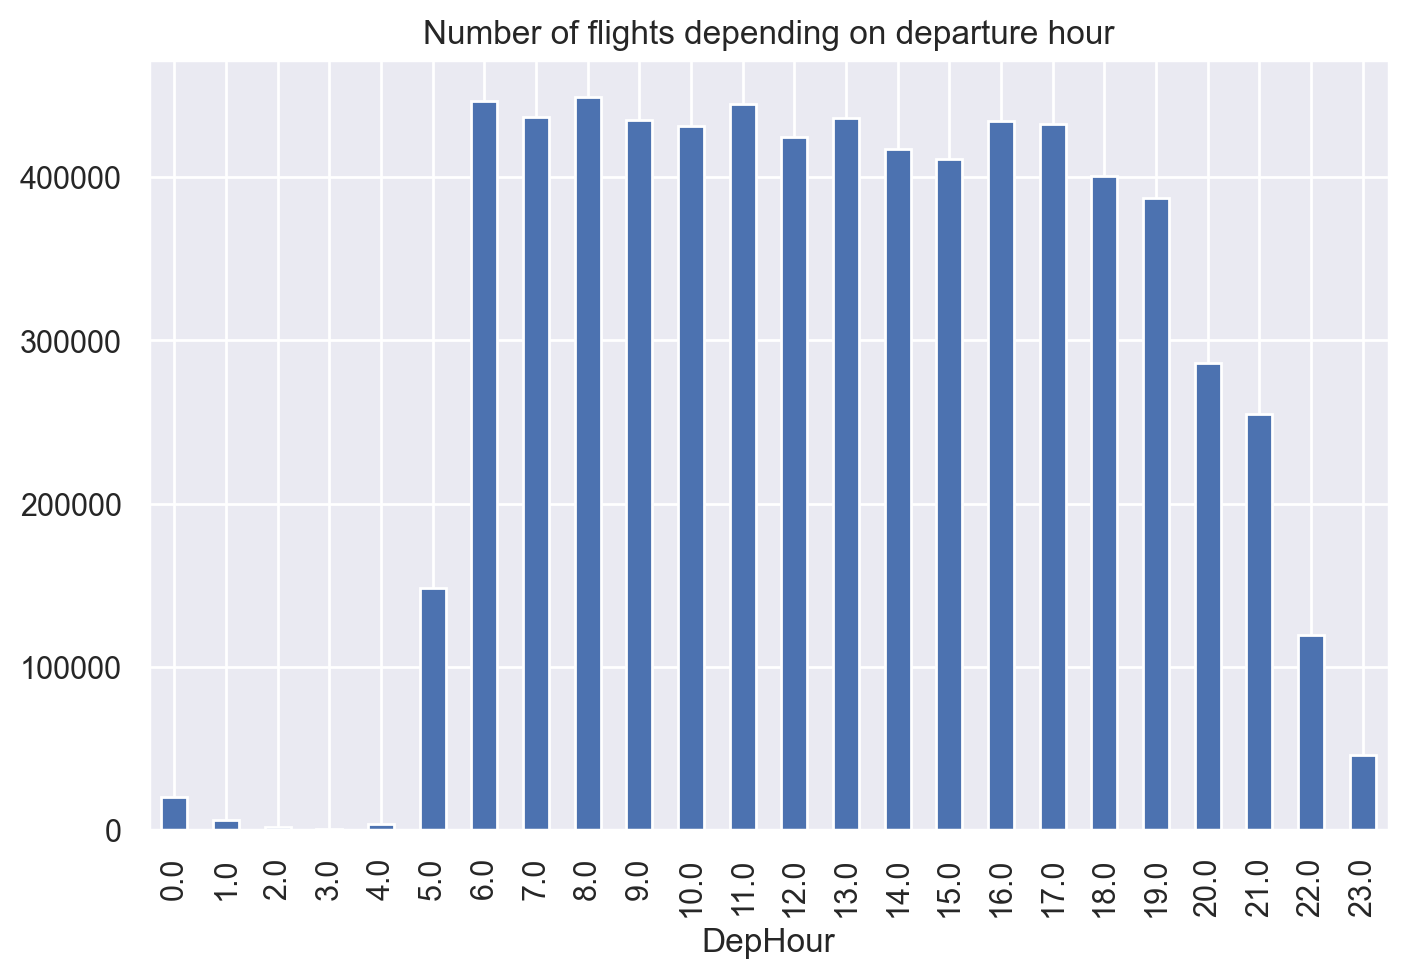

In [131]:
flights_df["DepHour"].value_counts(sort=False).sort_index().plot(kind='bar', title="Number of flights depending on departure hour")

16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.

<Axes: xlabel='DayOfWeek'>

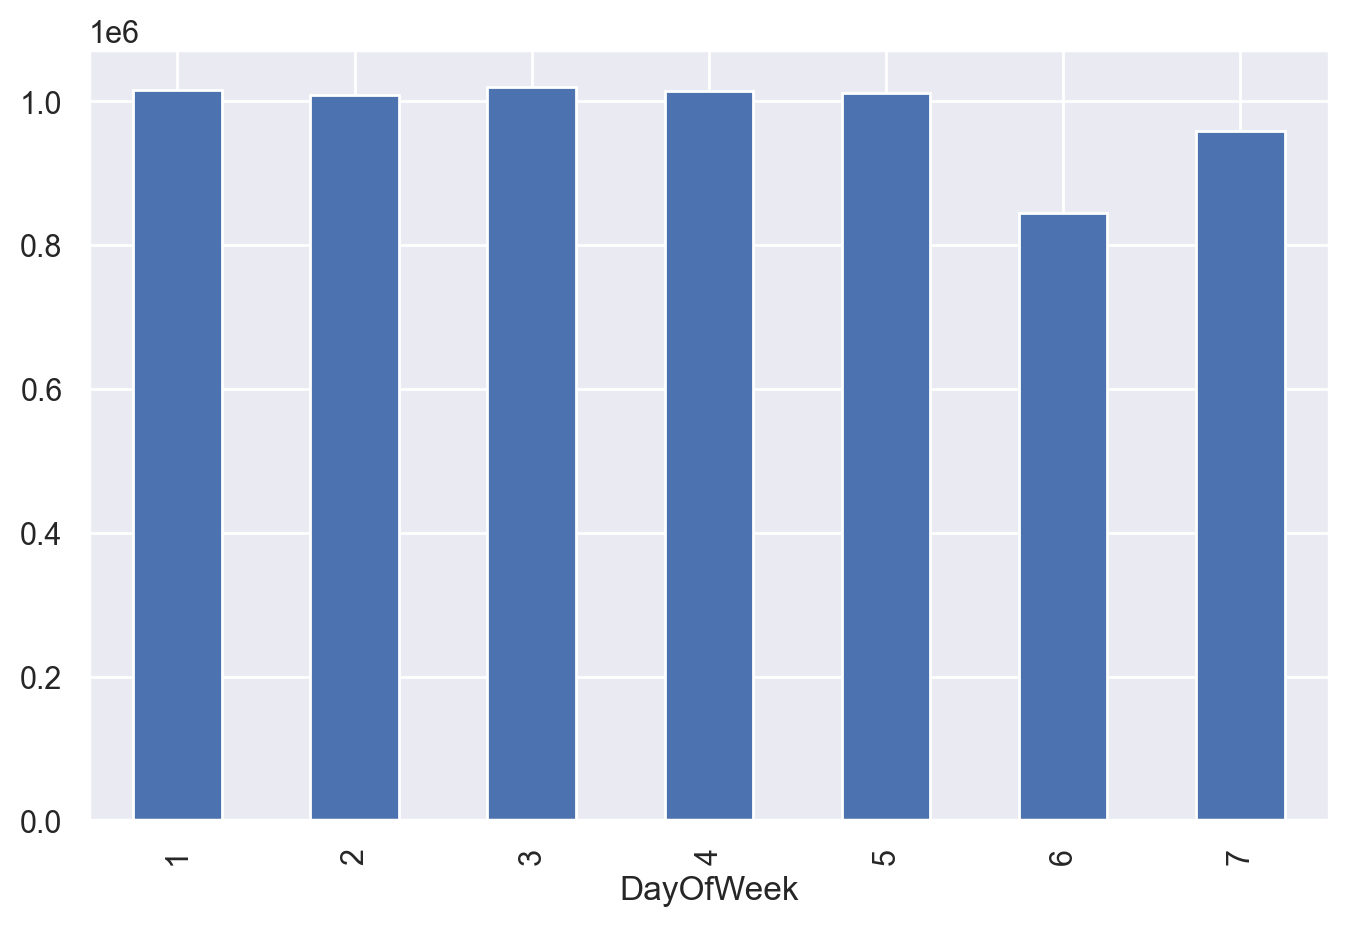

In [139]:
flights_df[flights_df["Cancelled"] == 0].groupby("DayOfWeek").size().plot(kind="bar")

<Axes: xlabel='Month'>

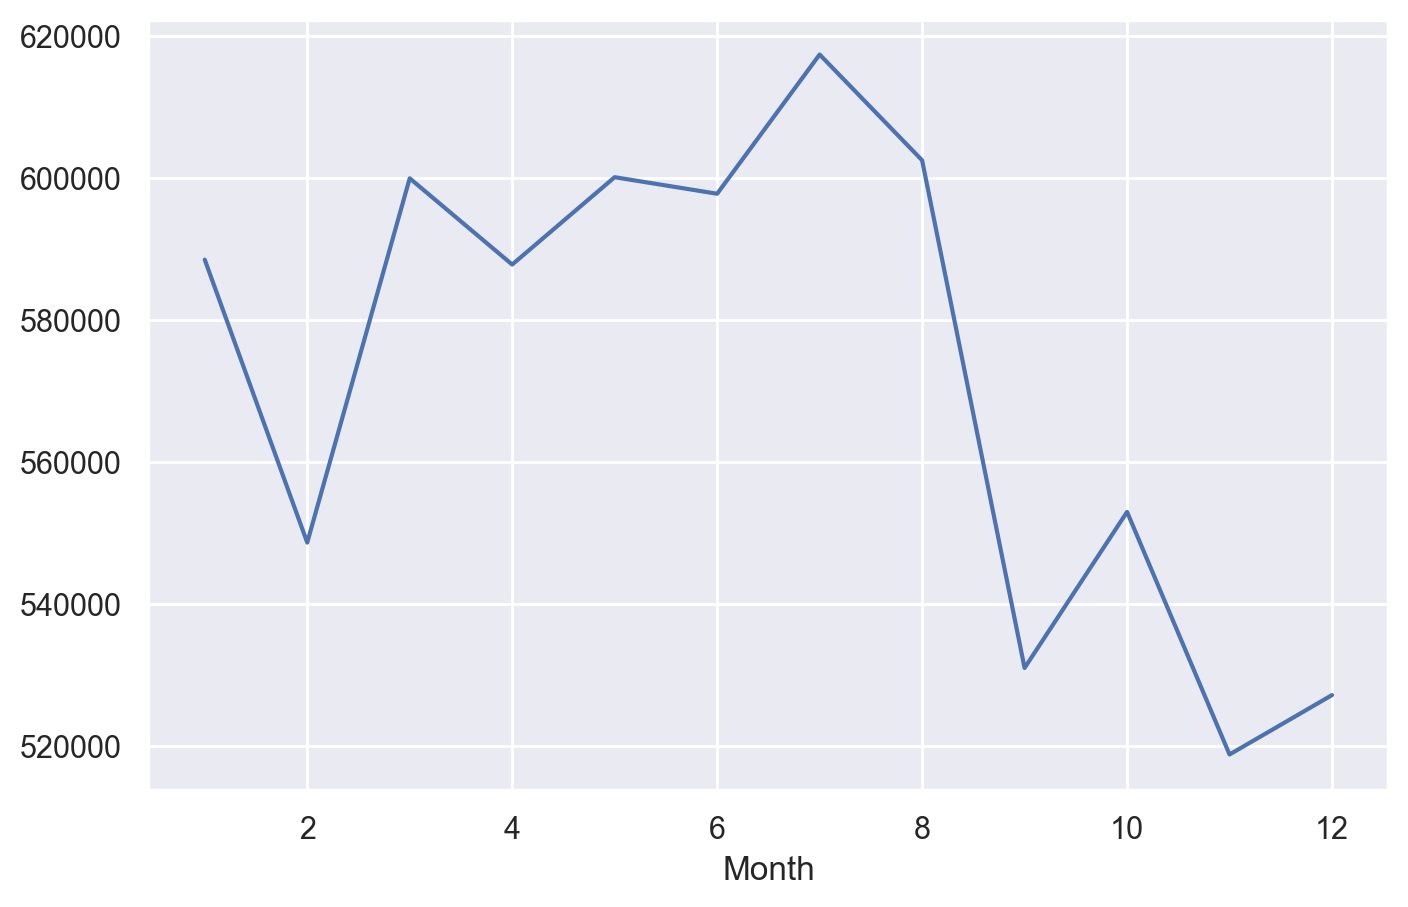

In [141]:
flights_df[flights_df["Cancelled"] == 0].groupby("Month").size().plot()

17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.

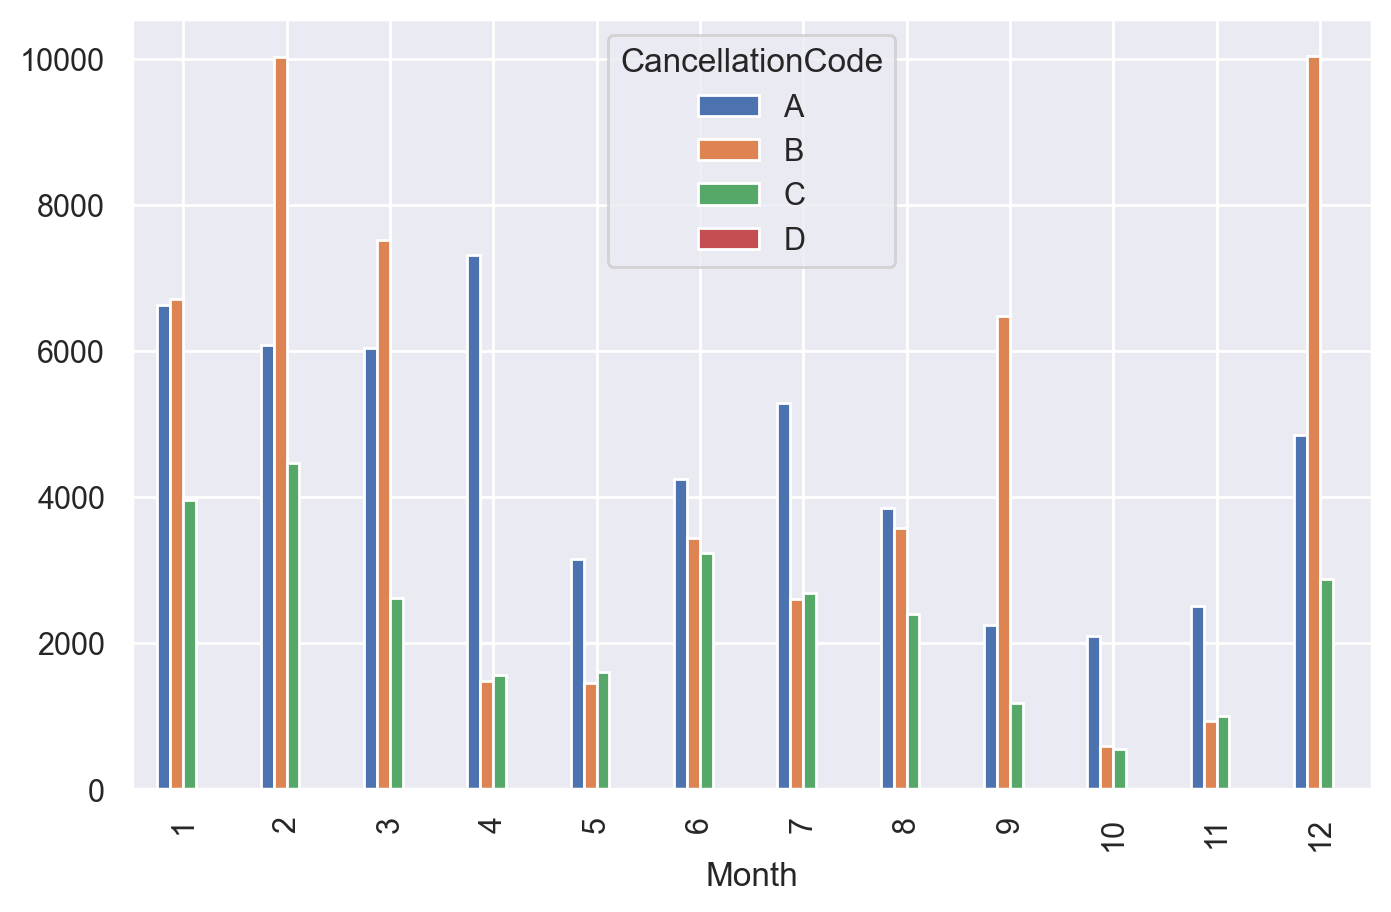

In [147]:
ax = flights_df.groupby(["Month", "CancellationCode"]).size().unstack().plot(kind="bar")


19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.

In [152]:
flights_df[(flights_df["Month"] == 4) & (flights_df["CancellationCode"] == "A")].groupby("UniqueCarrier").size().idxmax()

'AA'